In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import math

In [2]:
data=load_breast_cancer()

In [3]:
features=pd.DataFrame(data.data,columns=data.feature_names)
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
target=pd.DataFrame(data.target,columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
df=pd.concat([features,target],axis=1)
corr=df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [6]:
corrs=[abs(corr[attr]['target']) for attr in list(df)]
#Zip the corrs array with the features array
l=list(zip(corrs,list(features)))
#Now sort the above array by their corr. value in ascending order
l.sort()
corrs,labels=list(zip((*l)))

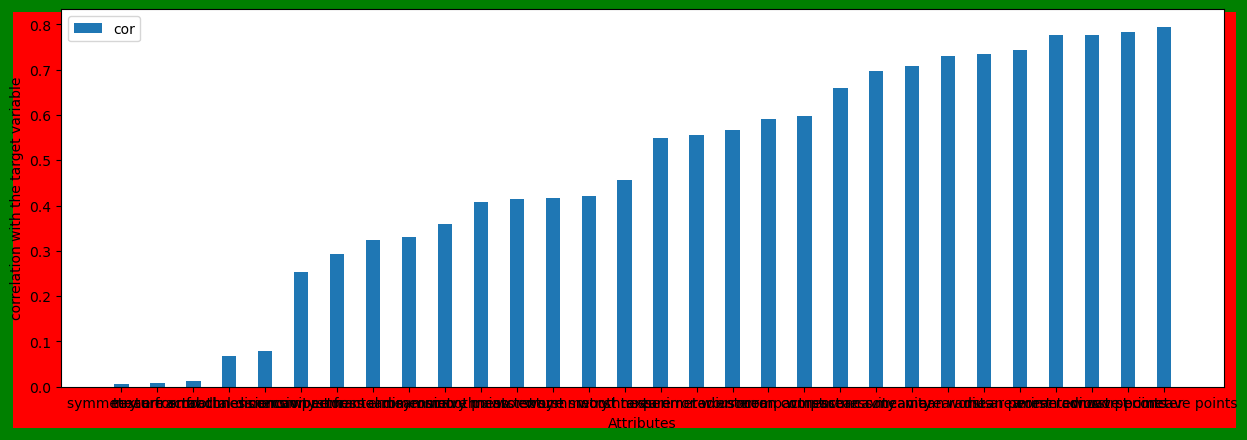

In [7]:
plt.figure(figsize=(15,5),dpi=100,facecolor="red",edgecolor="green",linewidth=18)
plt.bar(labels,corrs,width=0.4)
plt.xlabel('Attributes')
plt.legend(["cor"])
plt.ylabel('correlation with the target variable')
plt.show()

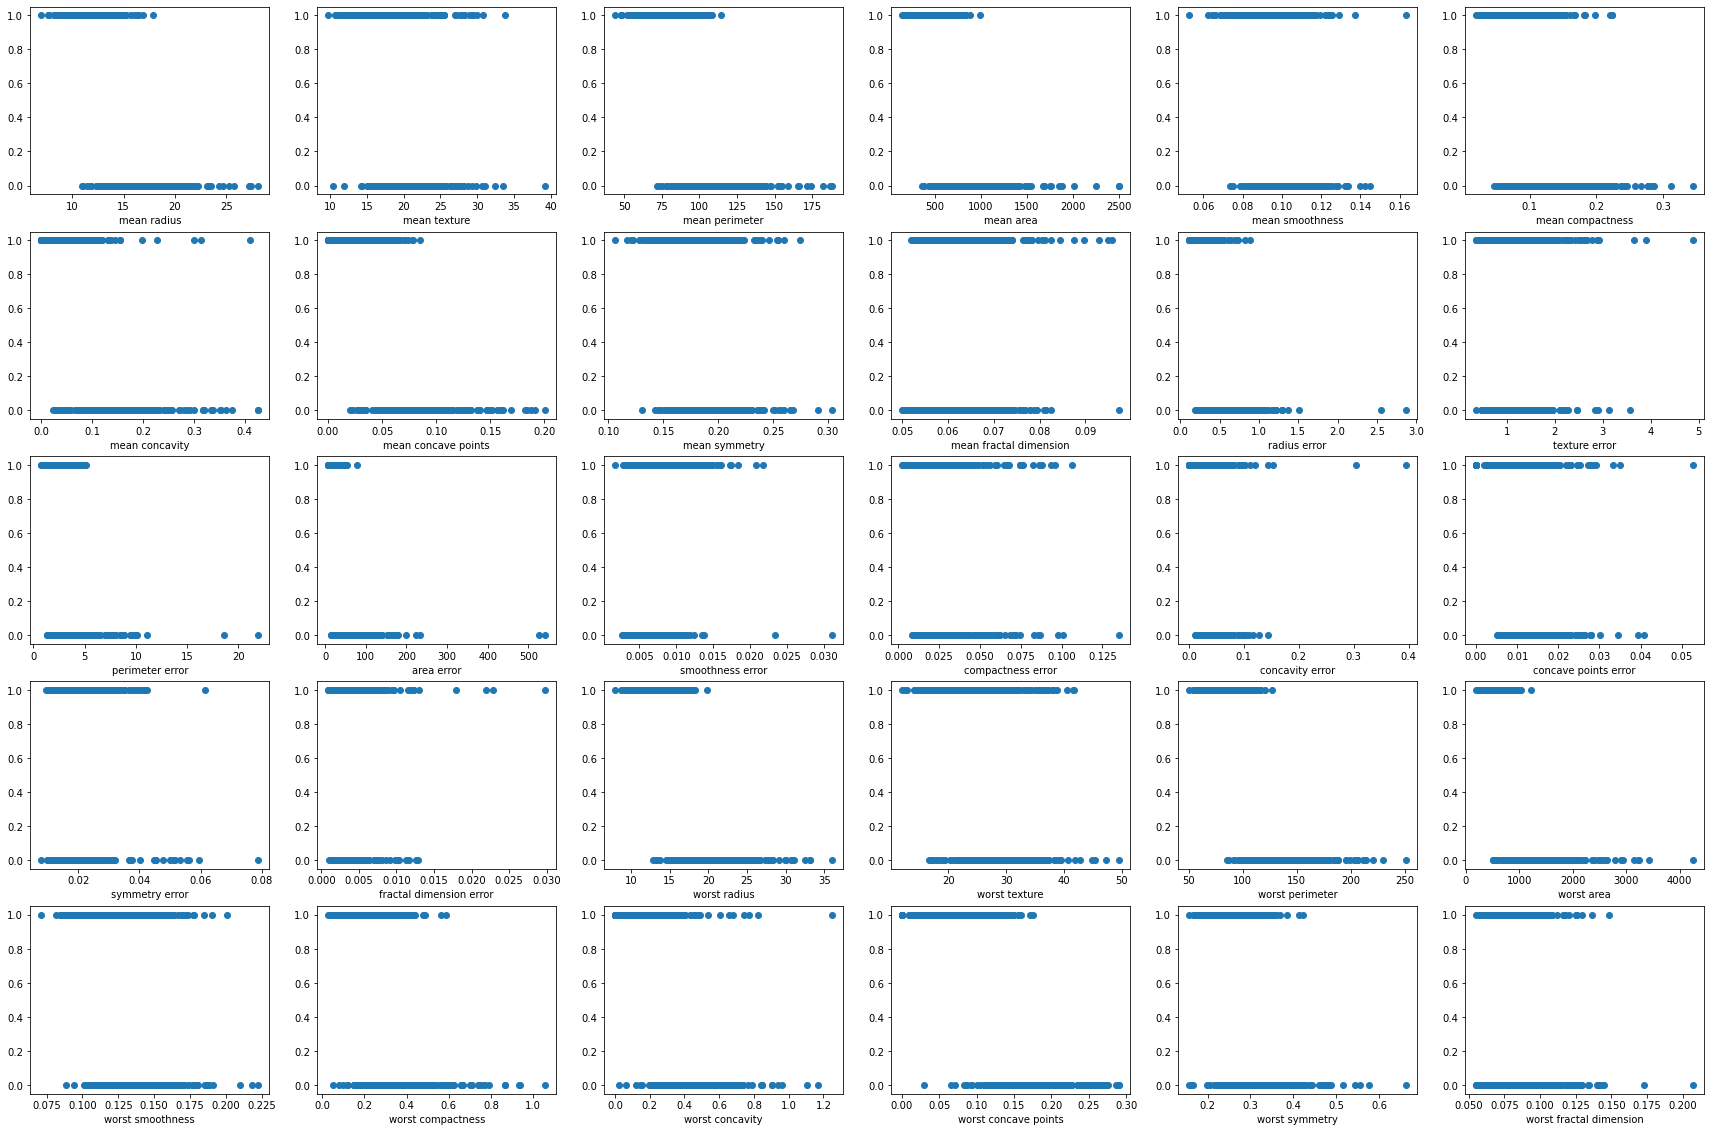

In [8]:
fig,ax=plt.subplots(5,6,figsize=(30,20))
k,l=0,0
for i in data.feature_names:
    ax[k][l].scatter(features[i],target)
    ax[k][l].set_xlabel(i)
    l+=1
    if(l==6):
        k+=1
        l=0

In [9]:
#features=features.drop(['mean compactness','mean concave points','worst fractal dimension','area error','compactness error','concave points error','concavity error','fractal dimension error','mean concavity','mean symmetry','perimeter error','radius error','symmetry error','texture error','worst concavity','worst smoothness','worst symmetry'],axis=1)
xscaler=MinMaxScaler()
X=xscaler.fit_transform(features)
yscaler=MinMaxScaler()
Y=yscaler.fit_transform(target)
#xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42,shuffle=False)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(model.coef_,model.intercept_,xtrain.shape)
accuracy_score(ypred,ytest)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.74436859 -1.51690876 -1.7219057  -1.47246989 -0.67311851 -0.36266651
  -1.35055009 -1.96296097 -0.55194288  0.93899178 -1.15026676 -0.16691054
  -0.90787709 -0.76462629 -0.10580966  0.57792498  0.2794016  -0.24366703
   0.26311712  0.62368928 -2.15465703 -2.19502768 -1.98057529 -1.55981296
  -1.5783968  -0.75357394 -1.31777258 -2.60240407 -1.07573807 -0.25670021]] [8.57487941] (455, 30)


0.956140350877193

In [11]:
def summer(x,y,n,c,mul,m):
    su=0
    if(mul==-1):
        for i in range(n):
            e=1/(1+math.exp(-m.dot(x[i])-c))
            su+=(-y[i]+e)
    else:    
        for i in range(n):
             e=1/(1+math.exp(-m.dot(x[i])-c))
             su+=(-y[i]+e)*x[i][mul]
    print(su)
    return su/n    

In [12]:
'''def update(learn,x,c,y,m):
    upd=c-learn*(summer(x,y,y.size,c,-1,m))
    r=np.zeros(len(m))
    for i in range(len(m)):
        r[i]=m[i]-learn*(summer(x,y,y.size,c,i,m))
    m=np.copy(r)
    c=upd
    return m,c'''

'def update(learn,x,c,y,m):\n    upd=c-learn*(summer(x,y,y.size,c,-1,m))\n    r=np.zeros(len(m))\n    for i in range(len(m)):\n        r[i]=m[i]-learn*(summer(x,y,y.size,c,i,m))\n    m=np.copy(r)\n    c=upd\n    return m,c'

In [13]:
def update(learn,x,c,y,m):
    leny=len(y)
    pred=1/(1+np.exp(-(x.dot(m)+c)))
    y=y.flatten()
    loss=pred-y
    updc=c-learn*(np.sum(loss)/leny)
    m=m-learn*((x.T.dot(loss))/leny)
    c=updc
    return m,c

In [14]:
def gradient(m,c,x,y,learn,n_iters):
    err=[]
    for i in range(n_iters):
        m,c=update(learn,x,c,y,m)
        ypredtest=np.zeros(len(y))
        for i in range(len(y)):
            y1=m.dot(x[i])+c
            ypredtest[i]=1/(1+math.exp(-y1))
            if(ypredtest[i]>=0.5):
                ypredtest[i]=1
            else:
                ypredtest[i]=0
        err.append(1-accuracy_score(y,ypredtest))
    return m,c,err

In [15]:
from statistics import mean
n=len(features.columns)  
init_m=np.zeros(n)
init_c=0
learning_rate=[5]
iters=[100,1000,5000,10000,50000,100000,500000]
train_accuracy=[]
test_accuracy=[]
for n_iters in iters:
    for learn in learning_rate:
        print(learn)
        acctrain=[]
        acctest=[]
        for i in range(1):
            xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i*5)
            m,c,err=gradient(init_m,init_c,xtrain,ytrain,learn,n_iters)
            ypredtest=np.zeros(len(ytest))
            ypredtrain=np.zeros(len(ytrain))
            sig=[]
            line=[]
            for i in range(len(ytest)):
                y=m.dot(xtest[i])+c
                line.append(y)
                ypredtest[i]=1/(1+math.exp(-y))
                sig.append(ypredtest[i])
                if(ypredtest[i]>=0.5):
                    ypredtest[i]=1
                else:
                    ypredtest[i]=0
            #plt.scatter(xtest,ytest)
            #plt.show()
            for i in range(len(ytrain)):
                y=m.dot(xtrain[i])+c
                #if(n_iters>=500000):
                 #   print(y)
                ypredtrain[i]=1/(1+math.exp(-y))
                if(ypredtrain[i]>=0.5):
                    ypredtrain[i]=1
                else:
                    ypredtrain[i]=0
                    
            acctrain.append(accuracy_score(ytrain,ypredtrain))
            acctest.append(accuracy_score(ytest,ypredtest))
        train_accuracy.append(mean(acctrain))
        test_accuracy.append(mean(acctest))
        print(n_iters,mean(acctrain),mean(acctest))

5
100 0.9692307692307692 0.9649122807017544
5
1000 0.9846153846153847 0.9649122807017544
5
5000 0.989010989010989 0.9736842105263158
5
10000 0.9868131868131869 0.9736842105263158
5


KeyboardInterrupt: 

In [ ]:
ypred=np.zeros(len(ytest))
for i in range(len(ytest)):
    y=m.dot(xtest[i])+c
    ypred[i]=1/(1+math.exp(-y))
    if(ypred[i]>=0.5):
        ypred[i]=1
    else:
        ypred[i]=0

In [ ]:
df1=pd.DataFrame(ypred,columns=['ypred'])
df2=pd.DataFrame(ytest,columns=['ytest'])
df=pd.concat([df1,df2],axis=1)

In [ ]:
err=mean_squared_error(ypred,ytest)
err

In [ ]:
err=r2_score(ypred,ytest)
err

In [ ]:
ypred=np.zeros(len(ytrain))
for i in range(len(ytrain)):
    y=m.dot(xtrain[i])+c
    ypred[i]=1/(1+math.exp(-y))
    if(ypred[i]>=0.5):
        ypred[i]=1
    else:
        ypred[i]=0
mean_squared_error(ypred,ytrain)

# sklearn model

In [16]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(xtrain, ytrain)

C:\Users\Bhagwan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [17]:
ypred=logisticRegr.predict(xtest)

In [19]:
accuracy_score(ypred,ytest)

0.9649122807017544

In [ ]:
r2_score(ypred,ytest)

In [ ]:
error=0.03508771929824561
[[0.02631578947368421, 'mean compactness'],
 [0.02631578947368421, 'mean concave points'],
 [0.02631578947368421, 'worst fractal dimension'],
 [0.03508771929824561, 'area error'],
 [0.03508771929824561, 'compactness error'],
 [0.03508771929824561, 'concave points error'],
 [0.03508771929824561, 'concavity error'],
 [0.03508771929824561, 'fractal dimension error'],
 [0.03508771929824561, 'mean concavity'],
 [0.03508771929824561, 'mean symmetry'],
 [0.03508771929824561, 'perimeter error'],
 [0.03508771929824561, 'radius error'],
 [0.03508771929824561, 'symmetry error'],
 [0.03508771929824561, 'texture error'],
 [0.03508771929824561, 'worst concavity'],
 [0.03508771929824561, 'worst smoothness'],
 [0.03508771929824561, 'worst symmetry'],
 [0.043859649122807015, 'mean area'],
 [0.043859649122807015, 'mean fractal dimension'],
 [0.043859649122807015, 'mean perimeter'],
 [0.043859649122807015, 'mean radius'],
 [0.043859649122807015, 'mean smoothness'],
 [0.043859649122807015, 'mean texture'],
 [0.043859649122807015, 'smoothness error'],
 [0.043859649122807015, 'worst area'],
 [0.043859649122807015, 'worst compactness'],
 [0.043859649122807015, 'worst concave points'],
 [0.043859649122807015, 'worst perimeter'],
 [0.043859649122807015, 'worst radius'],
 [0.043859649122807015, 'worst texture']]


In [ ]:
20
100 0.9773626373626373 0.9657894736842105
200 0.9830769230769231 0.9701754385964912
300 0.9846153846153847 0.9701754385964912
400 0.9865934065934067 0.9701754385964912
500 0.9876923076923078 0.9710526315789474
1000 0.9894505494505494 0.9719298245614035
1500 0.9892307692307692 0.9710526315789474
2000 0.9896703296703298 0.9692982456140351
3000 0.9894505494505494 0.9675438596491228
5000 0.9901098901098901 0.9631578947368421
10000 0.9903296703296703 0.9605263157894737
20000 0.9907692307692308 0.9596491228070175
50000 0.9936263736263736 0.9570175438596491
60000 0.9949450549450549 0.956140350877193
80000 0.9953846153846154 0.9552631578947368
100000 0.9958241758241758 0.9535087719298245
500000 0.9975824175824176 0.9508771929824561
1000000 0.998021978021978 0.9491228070175438

25
100 0.9782417582417582 0.9640350877192982
200 0.9830769230769231 0.9675438596491228
300 0.9852747252747253 0.9710526315789474
400 0.9863736263736264 0.9701754385964912
500 0.987912087912088 0.9719298245614035
1000 0.9894505494505494 0.9710526315789474
1500 0.98989010989011 0.968421052631579
2000 0.9896703296703298 0.9675438596491228
3000 0.9892307692307692 0.9649122807017544
5000 0.9901098901098901 0.9631578947368421
10000 0.9905494505494505 0.9614035087719298
20000 0.9912087912087912 0.9596491228070175
50000 0.9949450549450549 0.956140350877193
60000 0.9953846153846154 0.956140350877193
80000 0.9958241758241758 0.9535087719298245
100000 0.996043956043956 0.9526315789473684
500000 0.9978021978021978 0.95
1000000 0.9982417582417582 0.9482456140350877

30
100 0.9786813186813187 0.9640350877192982
200 0.9826373626373627 0.9675438596491228
300 0.9852747252747253 0.9692982456140351
400 0.9872527472527473 0.9701754385964912
500 0.9881318681318682 0.9719298245614035
1000 0.9901098901098901 0.9692982456140351
1500 0.9896703296703298 0.9675438596491228
2000 0.9896703296703298 0.9657894736842105
3000 0.9901098901098901 0.9640350877192982
5000 0.9901098901098901 0.962280701754386
10000 0.9905494505494505 0.9596491228070175
20000 0.9916483516483516 0.9570175438596491
50000 0.9953846153846154 0.956140350877193
60000 0.9958241758241758 0.9552631578947368
80000 0.996043956043956 0.9526315789473684
100000 0.996043956043956 0.9526315789473684
500000 0.9978021978021978 0.95
1000000 0.9986813186813187 0.9482456140350877

35
100 0.9789010989010989 0.9640350877192982
200 0.9826373626373627 0.9657894736842105
300 0.9852747252747253 0.9692982456140351
400 0.9872527472527473 0.9701754385964912
500 0.9881318681318682 0.9701754385964912
1000 0.98989010989011 0.9701754385964912
1500 0.9896703296703298 0.9666666666666667
2000 0.9887912087912089 0.9640350877192982
3000 0.98989010989011 0.9631578947368421
5000 0.9901098901098901 0.9614035087719298
10000 0.9905494505494505 0.9596491228070175
20000 0.9920879120879121 0.9570175438596491
50000 0.9958241758241758 0.9552631578947368
80000 0.996043956043956 0.9526315789473684
100000 0.996043956043956 0.9517543859649122
500000 0.998021978021978 0.9491228070175438

In [21]:
np.arange(0,n_iters,1)

array([   0,    1,    2, ..., 4997, 4998, 4999])